#       **EUROTRIP INSIGHTS**
A deep dive into tourist travel across Europe

## Objectives

* Analyse tourist travel preferences across European destinations.
* Examine seasonal trends and cost variations.
* Identify budget friendly travel options.
* Test hypotheses related to travel behaviors.
* Develop visualisation and dashboard to present findings.

## Hypotheses: 
* Travel cost is significantly higher during peak season (summer & winter).
* Business travellers prefer shorter trip duration compared to leisure travellers.
* Tourists travelling in larger group tend to have lower per-person travel cost. 

## Data Process and Cleaning 
* Load raw dataset and inspect structure.
* Handle missing values, duplicates and outliers.
* Convert categorical variables where necessary.
* Ensure consistency in column formats. 

## Inputs

* The dataset "https://www.kaggle.com/datasets/ashaychoudhary/tourist-travel-modes-in-europe-dataset/data" was uploaded in its raw form for the ETL phase of the analysis.

## Outputs

* Cleaned and processed dataset (CSV file) for further data analysis.
* Visualisation highlighting key trends (bar charts, scatter plots and correlation analysis).
* Statistical analysis on cost and travel patterns (regression and hypotheses testing).
* Tableau dashboards summarising findings.
Python-based interactive dashboard

## Additional Comments

* Potential for integrating additional dataset to enhance insights.
* Futher analysis could include machine learning predictions for travel cost estimation.
* Automate ETL steps using Python workflows.



---



## Change working directory

In [4]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\mukti\\Desktop\\codeInstitute\\Project2\\Hackathon2-Team-3\\jupyter_notebooks'

In [5]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [6]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\mukti\\Desktop\\codeInstitute\\Project2\\Hackathon2-Team-3'


## Data Load and Inspect Dataset

In [7]:

import pandas as pd  # Import the library

# Load the dataset
df = pd.read_csv('Tourist_Travel_Europe.csv') # Load the dataset

# Display basic info
df.info() 
df.head() # Display the first 5 rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Tourist_ID            1000 non-null   int64 
 1   Country_Visited       1000 non-null   object
 2   City_Visited          1000 non-null   object
 3   Mode_of_Travel        1000 non-null   object
 4   Travel_Duration_Days  1000 non-null   int64 
 5   Number_of_Companions  1000 non-null   int64 
 6   Total_Travel_Cost     1000 non-null   int64 
 7   Accommodation_Type    1000 non-null   object
 8   Main_Purpose          1000 non-null   object
 9   Season_of_Visit       1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


,Tourist_ID,Country_Visited,City_Visited,Mode_of_Travel,Travel_Duration_Days,Number_of_Companions,Total_Travel_Cost,Accommodation_Type,Main_Purpose,Season_of_Visit
0,1,Germany,Hamburg,Flight,8,4,1060,Hotel,Family Visit,Summer
1,2,Germany,Berlin,Car,16,3,3972,Hostel,Family Visit,Winter
2,3,UK,Manchester,Bicycle,8,2,666,Camping,Business,Winter
3,4,Greece,Thessaloniki,Bicycle,12,3,3644,Hotel,Business,Summer
4,5,Greece,Thessaloniki,Flight,5,3,1885,Airbnb,Leisure,Spring


## Check for Missing Values 

In [8]:
# Check for missing values
df.isnull().sum()

Tourist_ID              0
Country_Visited         0
City_Visited            0
Mode_of_Travel          0
Travel_Duration_Days    0
Number_of_Companions    0
Total_Travel_Cost       0
Accommodation_Type      0
Main_Purpose            0
Season_of_Visit         0
dtype: int64

## Check for Duplicates 

In [9]:
# Check for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

## Check for Negative Values 

In [10]:
# Check for negative values
negative_values = df.select_dtypes(include=['number'])[df.select_dtypes(include=['number']) < 0].dropna(how='all')
print(negative_values)

Empty DataFrame
Columns: [Tourist_ID, Travel_Duration_Days, Number_of_Companions, Total_Travel_Cost]
Index: []


## Check for Unique Values

In [12]:
# Checking for unique values in categorical columns in case of duplicates due to typos
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())

Unique values in 'Country_Visited':
['Germany' 'UK' 'Greece' 'Portugal' 'Spain' 'Austria' 'Italy'
 'Netherlands' 'France' 'Switzerland']
Unique values in 'City_Visited':
['Hamburg' 'Berlin' 'Manchester' 'Thessaloniki' 'Athens' 'Lisbon' 'Faro'
 'Madrid' 'Salzburg' 'London' 'Rome' 'Utrecht' 'Paris' 'Lucerne' 'Porto'
 'Lyon' 'Edinburgh' 'Seville' 'Rotterdam' 'Vienna' 'Santorini' 'Innsbruck'
 'Barcelona' 'Zurich' 'Nice' 'Geneva' 'Amsterdam' 'Venice' 'Milan'
 'Munich']
Unique values in 'Mode_of_Travel':
['Flight' 'Car' 'Bicycle' 'Bus' 'Train']
Unique values in 'Accommodation_Type':
['Hotel' 'Hostel' 'Camping' 'Airbnb']
Unique values in 'Main_Purpose':
['Family Visit' 'Business' 'Leisure']
Unique values in 'Season_of_Visit':
['Summer' 'Winter' 'Spring' 'Fall']


## Section 2: Exploratory Data Analysis (EDA)

Data Visualisation for EuroTrip Insights

Checking for outliers in numerical fields of dataset.

In [13]:
import numpy as np
import pandas as pd

In [14]:
import plotly.express as px  

# Select numerical columns only
numerical_cols = df.select_dtypes(include=['number']).columns

# Store outlier counts
outlier_counts = {}

# Iterate through each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

    # Display box plot for each numerical column
    fig = px.box(df, y=col, title=f"Outlier Detection in {col}")
    fig.show()

# Print outlier summary
print("Outlier Counts per Column:")
print(outlier_counts)

Outlier Counts per Column:
{'Tourist_ID': 0, 'Travel_Duration_Days': 0, 'Number_of_Companions': 0, 'Total_Travel_Cost': 0}


---

# Statistical Analysis & Insights 

1. Correlation Analysis
-  To check  for the correlation between Total_Travel_Cost and Travel_Duration_Days using scatterplot with trend lines

---

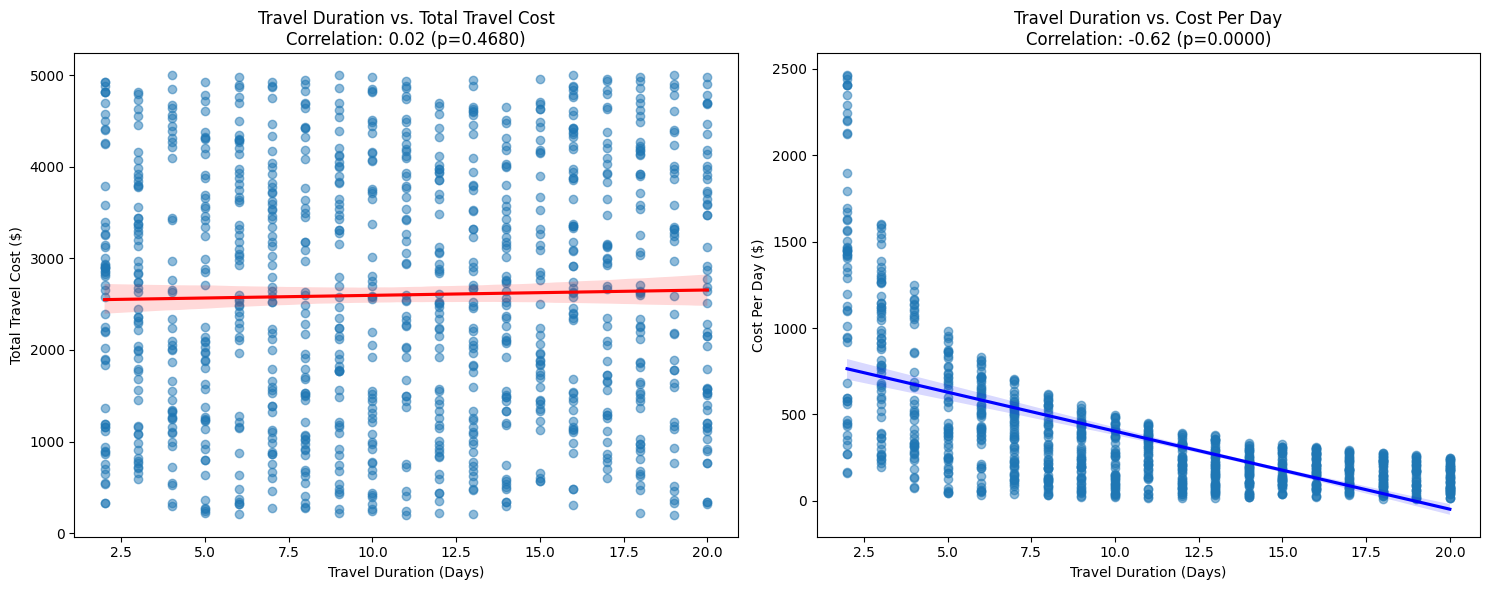

(0.022974554234132964,
 0.46801883299520997,
 -0.6239126133813776,
 5.576011858974995e-109)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 2: Create a new column for Cost Per Day
df["Cost_Per_Day"] = df["Total_Travel_Cost"] / df["Travel_Duration_Days"]

# Step 3: Analyze correlations
correlation_total_cost, p_value_total_cost = stats.pearsonr(df["Travel_Duration_Days"], df["Total_Travel_Cost"])
correlation_cost_per_day, p_value_cost_per_day = stats.pearsonr(df["Travel_Duration_Days"], df["Cost_Per_Day"])

# Step 4: Visualize results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for Total Travel Cost vs. Travel Duration
sns.regplot(x="Travel_Duration_Days", y="Total_Travel_Cost", data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[0])
axes[0].set_title(f"Travel Duration vs. Total Travel Cost\nCorrelation: {correlation_total_cost:.2f} (p={p_value_total_cost:.4f})")
axes[0].set_xlabel("Travel Duration (Days)")
axes[0].set_ylabel("Total Travel Cost ($)")

# Scatter plot for Travel Duration vs. Cost Per Day
sns.regplot(x="Travel_Duration_Days", y="Cost_Per_Day", data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "blue"}, ax=axes[1])
axes[1].set_title(f"Travel Duration vs. Cost Per Day\nCorrelation: {correlation_cost_per_day:.2f} (p={p_value_cost_per_day:.4f})")
axes[1].set_xlabel("Travel Duration (Days)")
axes[1].set_ylabel("Cost Per Day ($)")

plt.tight_layout()
plt.show()

# Return correlation results
correlation_total_cost, p_value_total_cost, correlation_cost_per_day, p_value_cost_per_day


2. Regression Analysis on Cost per Day Across Different Trip Durations:
- By removing potential outliers in the Total_Travel_Cost and Travel_Duration_Days we avoided skewed results. Also perform a regression analysis to quantify the impact of duration on cost per day.

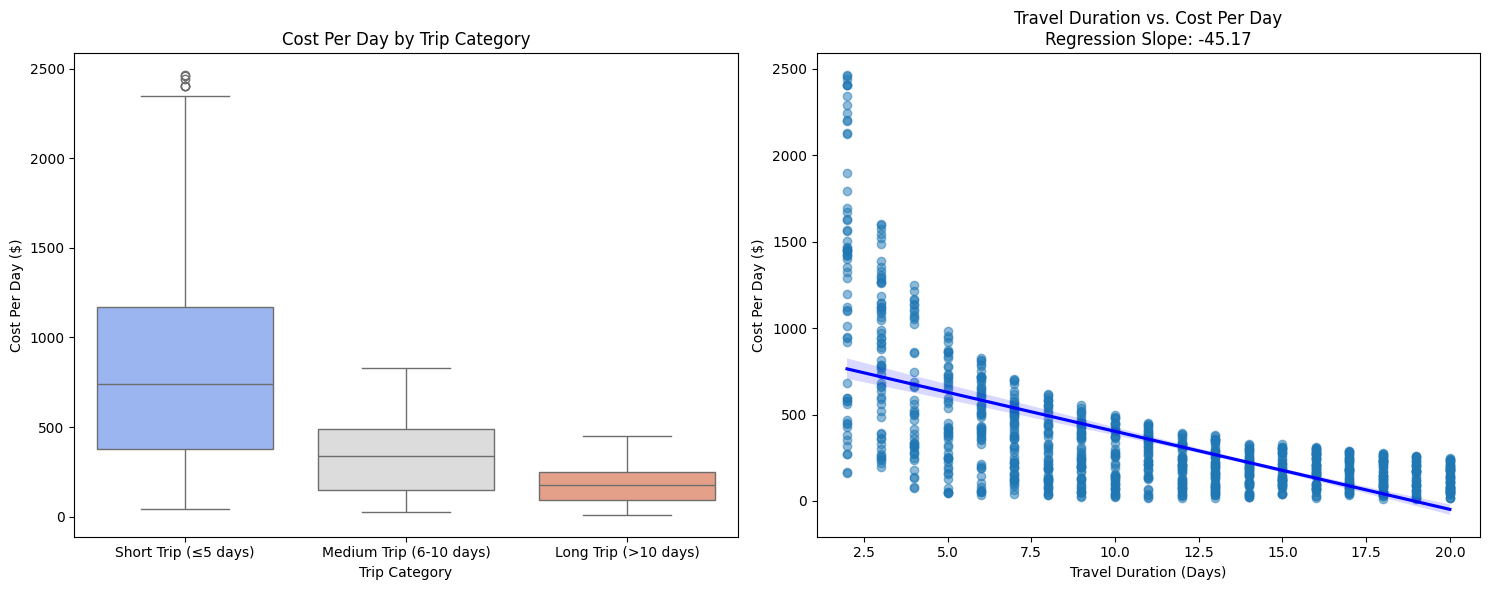

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cost_Per_Day   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     636.1
Date:                Mon, 10 Feb 2025   Prob (F-statistic):          5.58e-109
Time:                        13:25:39   Log-Likelihood:                -7157.0
No. Observations:                1000   AIC:                         1.432e+04
Df Residuals:                     998   BIC:                         1.433e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  854.7947     21.729     39.339      0.000     812.155     897.434
Travel_Duration_Days   -45.1726      1.791    -25.221      0.000     -48.687     -41.658
==============================================================================
Omnibus:                      439.329   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2936.961
Skew:                           1.891   Prob(JB):                         0.00
Kurtosis:                      10.496   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Step 1: Remove Outliers using IQR (Interquartile Range)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = remove_outliers(df, "Total_Travel_Cost")
df_cleaned = remove_outliers(df_cleaned, "Travel_Duration_Days")

# Step 2: Categorize Travel Durations
bins = [0, 5, 10, np.inf]  # Define short, medium, long trips
labels = ["Short Trip (≤5 days)", "Medium Trip (6-10 days)", "Long Trip (>10 days)"]
df_cleaned["Trip_Category"] = pd.cut(df_cleaned["Travel_Duration_Days"], bins=bins, labels=labels)

# Step 3: Perform Regression Analysis (Cost Per Day ~ Travel Duration)
X = sm.add_constant(df_cleaned["Travel_Duration_Days"])  # Add intercept
y = df_cleaned["Cost_Per_Day"]
model = sm.OLS(y, X).fit()
regression_summary = model.summary()

# Step 4: Enhanced Visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot: Cost Per Day by Trip Category
sns.boxplot(x="Trip_Category", y="Cost_Per_Day",data=df_cleaned, ax=axes[0], palette="coolwarm")
axes[0].set_title("Cost Per Day by Trip Category")
axes[0].set_xlabel("Trip Category")
axes[0].set_ylabel("Cost Per Day ($)")

# Scatter Plot with Regression Line: Travel Duration vs. Cost Per Day
sns.regplot(x="Travel_Duration_Days", y="Cost_Per_Day", data=df_cleaned, scatter_kws={"alpha": 0.5}, line_kws={"color": "blue"}, ax=axes[1])
axes[1].set_title(f"Travel Duration vs. Cost Per Day\nRegression Slope: {model.params[1]:.2f}")
axes[1].set_xlabel("Travel Duration (Days)")
axes[1].set_ylabel("Cost Per Day ($)")

plt.tight_layout()
plt.show()

# Output regression summary
regression_summary


## Travel Costs and Duration Insights 
To create visualisation showing the travel cost of each city with regards to length of travel and season.
Firstly, the dataset is grouped by City_Visited and Country_Visited, along with Latitude & Longitude. This was then used to create a Mapbox using the geographical location of the destination.

In [18]:
# Manually mapping known cities to their latitude and longitude coordinates
city_coordinates = {
    "Hamburg": (53.5511, 9.9937),
    "Berlin": (52.5200, 13.4050),
    "Manchester": (53.4808, -2.2426),
    "Thessaloniki": (40.6401, 22.9444),
    "Athens": (37.9838, 23.7275),
    "Lisbon": (38.7169, -9.1399),
    "Faro": (37.0194, -7.9322),
    "Madrid": (40.4168, -3.7038),
    "Salzburg": (47.8095, 13.0550),
    "London": (51.5074, -0.1278),
    "Rome": (41.9028, 12.4964),
    "Utrecht": (52.0907, 5.1214),
    "Paris": (48.8566, 2.3522),
    "Lucerne": (47.0505, 8.3059),
    "Porto": (41.1579, -8.6291),
    "Lyon": (45.7640, 4.8357),
    "Edinburgh": (55.9533, -3.1883),
    "Seville": (37.3886, -5.9823),
    "Rotterdam": (51.9225, 4.4792),
    "Vienna": (48.2082, 16.3738),
    "Santorini": (36.3932, 25.4615),
    "Innsbruck": (47.2692, 11.4041),
    "Barcelona": (41.3851, 2.1734),
    "Zurich": (47.3769, 8.5417),
    "Nice": (43.7102, 7.2620),
    "Geneva": (46.2044, 6.1432),
    "Amsterdam": (52.3676, 4.9041),
    "Venice": (45.4408, 12.3155),
    "Milan": (45.4642, 9.1900),
    "Munich": (48.1351, 11.5820)
} # Dictionary of city coordinates
df_copy = df.copy()
# Add latitude and longitude to the dataset
df_copy['Latitude'] = df['City_Visited'].map(lambda x: city_coordinates.get(x, (None, None))[0])
df_copy['Longitude'] = df['City_Visited'].map(lambda x: city_coordinates.get(x, (None, None))[1])

# Save and preview the updated dataset
df_copy

,Tourist_ID,Country_Visited,City_Visited,Mode_of_Travel,Travel_Duration_Days,Number_of_Companions,Total_Travel_Cost,Accommodation_Type,Main_Purpose,Season_of_Visit,Cost_Per_Day,Latitude,Longitude
0,1,Germany,Hamburg,Flight,8,4,1060,Hotel,Family Visit,Summer,132.500000,53.5511,9.9937
1,2,Germany,Berlin,Car,16,3,3972,Hostel,Family Visit,Winter,248.250000,52.5200,13.4050
2,3,UK,Manchester,Bicycle,8,2,666,Camping,Business,Winter,83.250000,53.4808,-2.2426
3,4,Greece,Thessaloniki,Bicycle,12,3,3644,Hotel,Business,Summer,303.666667,40.6401,22.9444
4,5,Greece,Thessaloniki,Flight,5,3,1885,Airbnb,Leisure,Spring,377.000000,40.6401,22.9444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,France,Lyon,Bus,20,5,4002,Hotel,Business,Fall,200.100000,45.7640,4.8357
996,997,Switzerland,Geneva,Bus,19,4,2170,Airbnb,Family Visit,Fall,114.210526,46.2044,6.1432
997,998,Austria,Vienna,Car,16,4,1102,Hotel,Leisure,Fall,68.875000,48.2082,16.3738
998,999,UK,Manchester,Flight,14,3,3319,Hotel,Business,Summer,237.071429,53.4808,-2.2426


In [19]:


df_grouped = df_copy.groupby(["City_Visited", "Country_Visited", "Latitude", "Longitude"], as_index=False).agg(
    {
        "Travel_Duration_Days": "mean",
        "Number_of_Companions": "mean",
        "Total_Travel_Cost": "mean"
    }
)

# Create a Mapbox scatter plot
fig = px.scatter_mapbox(
    df_grouped,
    lat="Latitude",
    lon="Longitude",
    hover_name="City_Visited",
    hover_data={
        "Country_Visited": True,
        "Travel_Duration_Days": ":.2f",  # Show averages with 2 decimal places
        "Number_of_Companions": ":.2f",
        "Total_Travel_Cost": ":.2f"
    }, # Include additional columns in hover data
    color="Total_Travel_Cost",  # Color by travel cost
    size="Travel_Duration_Days",  # Size represents travel duration
    size_max=20,  # Increase max size for better differentiation
    zoom=3,
    mapbox_style="carto-positron",
    title="Mapbox: Travel Cost, Duration & Companions"
)

fig.show()


  # Average Travel Cost by Mode of Travel #
 
  The use of a horizontal bar chart to visualise the cost of travel in relation to mode of transport.

In [20]:
# Calculate average travel cost by mode of travel
df_travel_mode = df.groupby("Mode_of_Travel", as_index=False)["Total_Travel_Cost"].mean()

# Create bar plot using Plotly
fig = px.bar(
    df_travel_mode, 
    x="Total_Travel_Cost", 
    y="Mode_of_Travel", 
    orientation='h', 
    color="Total_Travel_Cost", 
    color_continuous_scale="viridis",
    title="Average Travel Cost by Mode of Travel",
    labels={"Total_Travel_Cost": "Average Travel Cost (€)", "Mode_of_Travel": "Mode of Travel"}
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Average Travel Cost (€)",
    yaxis_title="Mode of Travel",
    xaxis_showgrid=True,
    plot_bgcolor="white"
)

# Show plot
fig.show()

# Correlational Analysis using Heatmap

Heatmap which visualises the relationship between Total Travel Cost, Season of Visit, and Main Purpose of Travel. This will help identify whether costs vary based on the season and travel purpose (e.g., business, leisure, family visits).

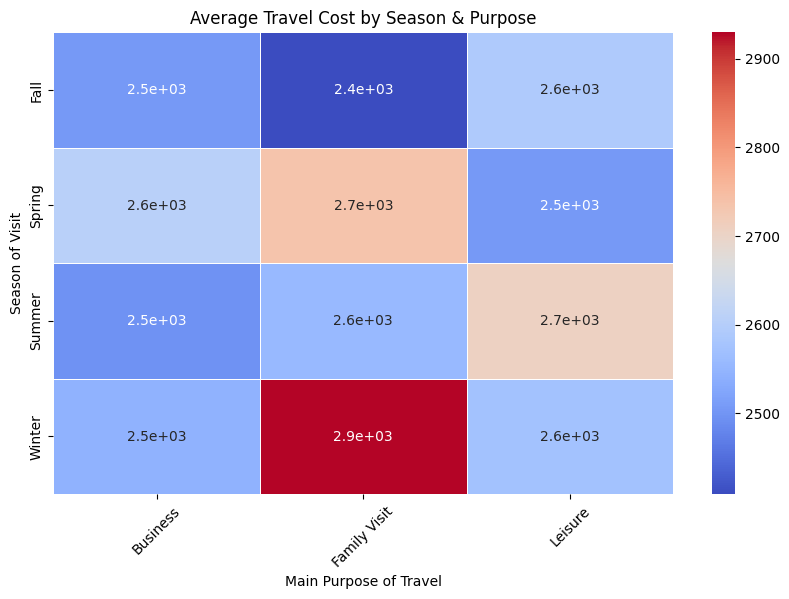

In [23]:
import pandas as pd # Importing the pandas library
import seaborn as sns
import matplotlib.pyplot as plt
heatmap_data = df.pivot_table(index="Season_of_Visit", #    # Create a pivot table
                              columns="Main_Purpose", 
                              values="Total_Travel_Cost", 
                              aggfunc="mean")

# Plot heatmap    # Heatmap of average travel cost by season and purpose
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)

# Formatting the plot  # Add labels and title
plt.title("Average Travel Cost by Season & Purpose")
plt.xlabel("Main Purpose of Travel")
plt.ylabel("Season of Visit")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Show the plot


We can add more filters to this dataset which give additional information country visited and mode of travel which will make more interactive to user. These Filters will be displayed in Tabaleu Dashboard.

---

## Conclusion and Next Steps

The Tourist Travel Modes in Europe dataset reveals key trends in how travelers move, spend, and experience different destinations across Europe. Travel preferences vary based on purpose, season, and location. Business travelers typically spend more on flights and hotels, while leisure travelers opt for budget-friendly options like Airbnb and hostels. Seasonal trends heavily influence costs, with summer and winter being the most expensive travel periods. Additionally, longer trips tend to increase overall costs, though travelers may benefit from discounts on accommodations and travel packages.
This study provides the following insights into the actors involved:
    •	Travelers may therefore choose wisely where they would want their trip: cheap destinations during off-peak seasons.
    •	Marketing, pricing strategies, and service development for the tourism sector may be improved according to traveler behavior.
    •	Transporting and accommodation service providers may be able to adjust their offerings accordingly based on the needs of different tourist segments.

Future work can be extend further predictive modeling toward estimating travel costs related to various influential factors. The incorporation of external data such as flight prices, economic conditions, or local events might significantly increase the accuracy of travel forecast trends.

Overall, the project serves as a base to understand European tourism trends and offers practical recommendations for which travelers and personnel within the Travel industry can benefit.
